<a href="https://colab.research.google.com/github/Noob919/Python_Basic/blob/main/modified_pet_dtg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [ ]:
df =  pd.read_csv("/content/MODIFIED PET MP.csv")
df.columns

Index(['time', 'tem', 'heating rate', 'Weight loss', 'DTG ', 'Unnamed: 5'], dtype='object')

In [ ]:
df.drop(0, inplace=True)
df.rename(columns={'Unnamed: 5': "label"}, errors="raise",inplace =  True)
df_na = df.dropna()
df_na.tail(5)

,time,tem,heating rate,Weight loss,DTG,label
4024,67.05,964.81,14.38941089,68.2224429,-0.226608467,Training
4025,67.06666667,964.96,14.38807157,68.2224429,-0.098593044,Training
4026,67.08333333,965.12,14.38688199,68.2224429,-0.098570252,Training
4027,67.1,965.29,14.38584203,68.2224429,-0.098546047,Test
4028,67.11666667,965.43,14.3843556,68.2224429,-0.098526122,Training


In [ ]:
df_res =  df_na[['time', 'tem', 'heating rate', 'DTG ']]
df_res.tail(3)

,time,tem,heating rate,DTG
4026,67.08333333,965.12,14.38688199,-0.098570252
4027,67.1,965.29,14.38584203,-0.098546047
4028,67.11666667,965.43,14.3843556,-0.098526122


In [ ]:
label = df_na['label']
label = label.reset_index()
label

,index,label
0,1,Training
1,2,Test
2,3,Training
3,4,Training
4,5,Validation
...,...,...
4023,4024,Training
4024,4025,Training
4025,4026,Training
4026,4027,Test


In [ ]:
def root_series(df):
  df_sq = df*df
  df_sum = df_sq.sum(axis=1)
  root =  pd.Series(data  = df_sum)
  root = pd.DataFrame(np.power(root, 0.5), columns = ['Root']) 
  return root

def transformation(DataFrame):
  scaler  = Normalizer()
  transform_df = scaler.fit_transform(DataFrame)
  return transform_df

In [ ]:
transform_df = transformation(df_res)
transform_df = pd.DataFrame(transform_df)
transform_df.columns = ['time', 'tem', 'heating rate', 'DTG ']
transform_df

,time,tem,heating rate,DTG
0,0.000000e+00,1.000000,0.000000,0.000367
1,9.122055e-07,0.016664,0.999861,0.000006
2,3.647303e-06,0.033315,0.999445,0.000012
3,8.200745e-06,0.049938,0.998752,0.000017
4,1.456355e-05,0.066519,0.997785,0.000023
...,...,...,...,...
4023,6.932066e-02,0.997483,0.014877,-0.000234
4024,6.932709e-02,0.997483,0.014873,-0.000102
4025,6.933280e-02,0.997483,0.014869,-0.000102
4026,6.933779e-02,0.997482,0.014866,-0.000102


In [ ]:
dataframe = pd.concat([transform_df,label],axis =1)
dataframe

,time,tem,heating rate,DTG,index,label
0,0.000000e+00,1.000000,0.000000,0.000367,1,Training
1,9.122055e-07,0.016664,0.999861,0.000006,2,Test
2,3.647303e-06,0.033315,0.999445,0.000012,3,Training
3,8.200745e-06,0.049938,0.998752,0.000017,4,Training
4,1.456355e-05,0.066519,0.997785,0.000023,5,Validation
...,...,...,...,...,...,...
4023,6.932066e-02,0.997483,0.014877,-0.000234,4024,Training
4024,6.932709e-02,0.997483,0.014873,-0.000102,4025,Training
4025,6.933280e-02,0.997483,0.014869,-0.000102,4026,Training
4026,6.933779e-02,0.997482,0.014866,-0.000102,4027,Test


In [ ]:
df_training = dataframe.loc[dataframe['label'] == "Training"]
X =  df_training[['time', 'tem', 'heating rate']]
y = df_training['DTG ']

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DTCLF = DecisionTreeRegressor()
DTCLF.fit(X,y)

DecisionTreeRegressor()

In [ ]:
df_val = dataframe.loc[dataframe['label'] == "Validation"]
X_val =  df_val[['time', 'tem', 'heating rate']]
y_val = df_val['DTG ']
predictions_val = DTCLF.predict(X_val)
prediction_val  = pd.DataFrame(predictions_val)
prediction_val

,0
0,0.000017
1,0.000115
2,0.000165
3,0.000196
4,0.000202
...,...
401,0.000000
402,0.000000
403,0.000000
404,0.000000


In [ ]:
print('MSE',mean_squared_error(y_val,predictions_val))
print('RMSE',math.sqrt(mean_squared_error(y_val, predictions_val)))
print('MAE',mean_absolute_error(y_val,predictions_val))
print('R2_Score',r2_score(y_val,predictions_val))

MSE 6.503616395595832e-06
RMSE 0.002550218891702403
MAE 0.00018178052034331025
R2_Score -0.14813798697311964


In [ ]:
X_val_df = pd.DataFrame(X_val)
X_val_df = X_val_df.reset_index(drop = True)
X_val_df
prediction = pd.DataFrame(predictions_val)
y_val_df =  pd.DataFrame(y_val)
y_val_df = y_val_df.reset_index(drop= True)

In [ ]:
final_df = pd.concat([X_val_df,prediction,y_val_df],axis =1)
final_df.rename(columns={0: "preditions"}, errors="raise",inplace =  True)
final_df.head(3)

,time,tem,heating rate,preditions,DTG
0,0.000015,0.066519,0.997785,0.000017,0.000023
1,0.000412,0.344255,0.938876,0.000115,0.000111
2,0.001151,0.544988,0.838443,0.000165,0.000173


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


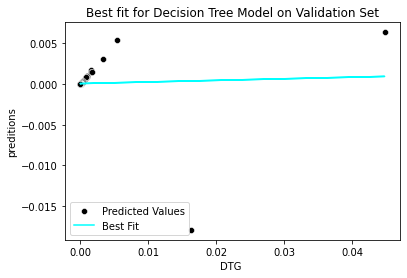

In [ ]:
x = final_df['DTG ']
y = final_df['preditions']
a,b = np.polyfit(x,y,1)
sns.scatterplot(x, y ,color = 'black', label = 'Predicted Values')
plt.plot(x, a*x+b, color='cyan', label = 'Best Fit') 
plt.title('Best fit for Decision Tree Model on Validation Set')
plt.legend()

In [ ]:
df_test = dataframe.loc[dataframe['label'] == "Test"]
X_test =  df_test[['time', 'tem', 'heating rate']]
y_test = df_test['DTG ']

In [ ]:
predictions_test = DTCLF.predict(X_test)
prediction_test  = pd.DataFrame(predictions_test)
prediction_test

,0
0,0.000012
1,0.000043
2,0.000062
3,0.000099
4,0.000119
...,...
401,0.000000
402,0.000000
403,0.000000
404,0.000000


In [ ]:
print('MSE',mean_squared_error(y_test,predictions_test))
print('RMSE',math.sqrt(mean_squared_error(y_test, predictions_test)))
print('MAE',mean_absolute_error(y_test,predictions_test))
print('R2_Score',r2_score(y_test,predictions_test))

MSE 1.6391209537514017e-08
RMSE 0.00012802815915849926
MAE 1.0506847956503817e-05
R2_Score 0.8901959634693809


In [ ]:
X_test_df = pd.DataFrame(X_test)
X_test_df = X_test_df.reset_index(drop = True)
X_test_df

,time,tem,heating rate
0,9.122055e-07,0.016664,0.999861
1,7.300459e-05,0.148340,0.988936
2,1.285670e-04,0.196116,0.980581
3,3.446661e-04,0.316228,0.948683
4,5.231837e-04,0.384615,0.923077
...,...,...,...
401,6.901026e-02,0.997501,0.015114
402,6.913824e-02,0.997494,0.015007
403,6.914473e-02,0.997494,0.015004
404,6.915051e-02,0.997493,0.015000


In [ ]:
prediction = pd.DataFrame(predictions_test)
y_test_df =  pd.DataFrame(y_test)
y_test_df = y_test_df.reset_index(drop= True)
final_df_test = pd.concat([X_test_df,prediction,y_test_df],axis =1)
final_df_test.rename(columns={0: "predictions_test"}, errors="raise",inplace =  True)
final_df_test

,time,tem,heating rate,predictions_test,DTG
0,9.122055e-07,0.016664,0.999861,0.000012,0.000006
1,7.300459e-05,0.148340,0.988936,0.000043,0.000048
2,1.285670e-04,0.196116,0.980581,0.000062,0.000062
3,3.446661e-04,0.316228,0.948683,0.000099,0.000103
4,5.231837e-04,0.384615,0.923077,0.000119,0.000122
...,...,...,...,...,...
401,6.901026e-02,0.997501,0.015114,0.000000,0.000000
402,6.913824e-02,0.997494,0.015007,0.000000,0.000000
403,6.914473e-02,0.997494,0.015004,0.000000,0.000000
404,6.915051e-02,0.997493,0.015000,0.000000,0.000000


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


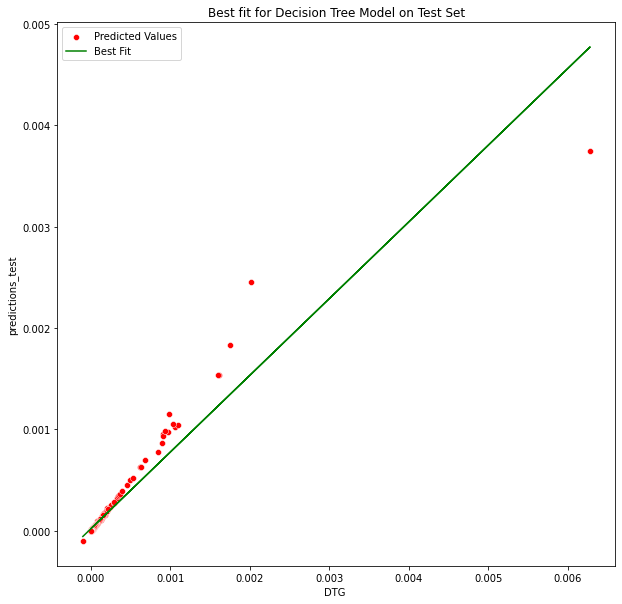

In [ ]:
x = final_df_test['DTG ']
y = final_df_test['predictions_test']
plt.figure(figsize=(10, 10))
a,b = np.polyfit(x,y,1)
sns.scatterplot(x, y ,color = 'Red', label = 'Predicted Values')
plt.plot(x, a*x+b, color='green', label = 'Best Fit') 
plt.title('Best fit for Decision Tree Model on Test Set')
plt.legend()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfc = RandomForestRegressor()

df_training = dataframe.loc[dataframe['label'] == "Training"]
X =  df_training[['time', 'tem', 'heating rate']]
y = df_training['DTG ']


rfc.fit(X,y)

df_val = dataframe.loc[dataframe['label'] == "Validation"]
X_val =  df_val[['time', 'tem', 'heating rate']]
y_val = df_val['DTG ']

predictions_val = rfc.predict(X_val)
prediction_val  = pd.DataFrame(predictions_val)
prediction_val
print('MSE',mean_squared_error(y_val,predictions_val))
print('RMSE',math.sqrt(mean_squared_error(y_val, predictions_val)))
print('MAE',mean_absolute_error(y_val,predictions_val))
print('R2_Score',r2_score(y_val,predictions_val))

MSE 7.062441555843069e-06
RMSE 0.0026575254572333016
MAE 0.00021374516467137058
R2_Score -0.24679208271448005


In [ ]:
X_val_df = pd.DataFrame(X_val)
X_val_df = X_val_df.reset_index(drop = True)
X_val_df
prediction = pd.DataFrame(predictions_val)
y_val_df =  pd.DataFrame(y_val)
y_val_df = y_val_df.reset_index(drop= True)
final_df = pd.concat([X_val_df,prediction,y_val_df],axis =1)
final_df.rename(columns={0: "preditions"}, errors="raise",inplace =  True)
final_df.head(3)

,time,tem,heating rate,preditions,DTG
0,0.000015,0.066519,0.997785,0.000022,0.000023
1,0.000412,0.344255,0.938876,0.000111,0.000111
2,0.001151,0.544988,0.838443,0.000164,0.000173


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


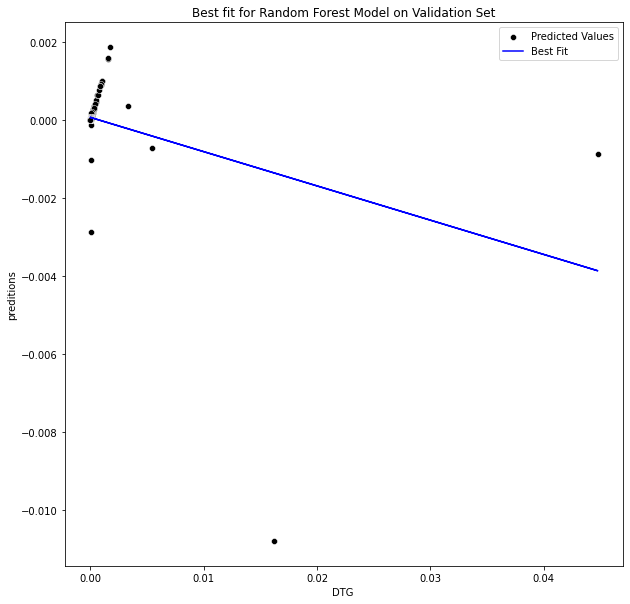

In [ ]:
x = final_df['DTG ']
y = final_df['preditions']
plt.figure(figsize=(10, 10))
a,b = np.polyfit(x,y,1)
sns.scatterplot(x, y ,color = 'black', label = 'Predicted Values')
plt.plot(x, a*x+b, color='Blue', label = 'Best Fit') 
plt.title('Best fit for Random Forest Model on Validation Set')
plt.legend()

In [ ]:
df_test = dataframe.loc[dataframe['label'] == "Test"]
X_test =  df_test[['time', 'tem', 'heating rate']]
y_test = df_test['DTG ']

predictions_test = rfc.predict(X_test)
prediction_test  = pd.DataFrame(predictions_test)
prediction_test

print('MSE',mean_squared_error(y_test,predictions_test))
print('RMSE',math.sqrt(mean_squared_error(y_test, predictions_test)))
print('MAE',mean_absolute_error(y_test,predictions_test))
print('R2_Score',r2_score(y_test,predictions_test))

MSE 1.1798377298945696e-08
RMSE 0.00010862033556818767
MAE 1.1621593210375474e-05
R2_Score 0.9209631571745531


In [ ]:
X_test_df = pd.DataFrame(X_test)
X_test_df = X_test_df.reset_index(drop = True)
prediction = pd.DataFrame(predictions_test)
y_test_df =  pd.DataFrame(y_test)
y_test_df = y_test_df.reset_index(drop= True)
final_df_test = pd.concat([X_test_df,prediction,y_test_df],axis =1)
final_df_test.rename(columns={0: "predictions_test"}, errors="raise",inplace =  True)
final_df_test

,time,tem,heating rate,predictions_test,DTG
0,9.122055e-07,0.016664,0.999861,0.000015,0.000006
1,7.300459e-05,0.148340,0.988936,0.000048,0.000048
2,1.285670e-04,0.196116,0.980581,0.000064,0.000062
3,3.446661e-04,0.316228,0.948683,0.000103,0.000103
4,5.231837e-04,0.384615,0.923077,0.000122,0.000122
...,...,...,...,...,...
401,6.901026e-02,0.997501,0.015114,0.000000,0.000000
402,6.913824e-02,0.997494,0.015007,0.000000,0.000000
403,6.914473e-02,0.997494,0.015004,0.000000,0.000000
404,6.915051e-02,0.997493,0.015000,0.000000,0.000000


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


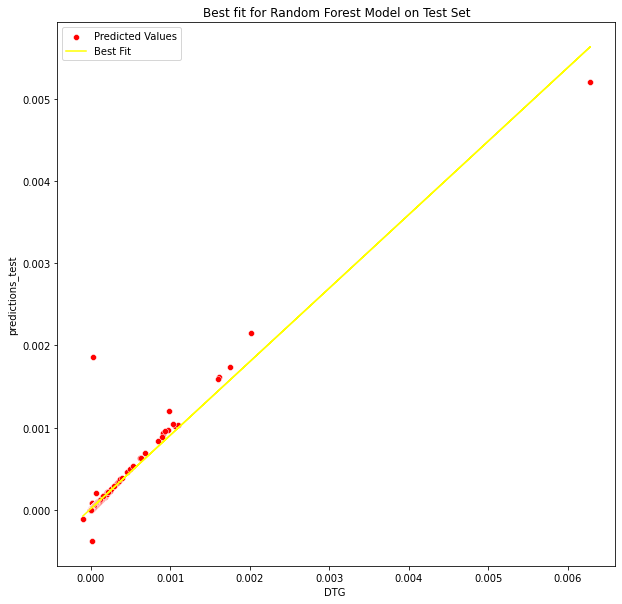

In [ ]:
x = final_df_test['DTG ']
y = final_df_test['predictions_test']
a,b = np.polyfit(x,y,1)
plt.figure(figsize=(10, 10))
sns.scatterplot(x, y ,color = 'Red', label = 'Predicted Values')
plt.plot(x, a*x+b, color='yellow', label = 'Best Fit') 
plt.title('Best fit for Random Forest Model on Test Set')
plt.legend()

In [ ]:
from sklearn.svm import SVR

svr = SVR()

df_training = dataframe.loc[dataframe['label'] == "Training"]
X =  df_training[['time', 'tem', 'heating rate']]
y = df_training['DTG ']

svr.fit(X,y)

df_val = dataframe.loc[dataframe['label'] == "Validation"]
X_val =  df_val[['time', 'tem', 'heating rate']]
y_val = df_val['DTG ']

predictions_val = svr.predict(X_val)
prediction_val  = pd.DataFrame(predictions_val)
prediction_val
print('MSE',mean_squared_error(y_val,predictions_val))
print('RMSE',math.sqrt(mean_squared_error(y_val, predictions_val)))
print('MAE',mean_absolute_error(y_val,predictions_val))
print('R2_Score',r2_score(y_val,predictions_val))

MSE 2.9269329418904468e-05
RMSE 0.0054101136234745075
MAE 0.005110081887703276
R2_Score -4.167160378928733


In [ ]:
X_val_df = pd.DataFrame(X_val)
X_val_df = X_val_df.reset_index(drop = True)
X_val_df
prediction = pd.DataFrame(predictions_val)
y_val_df =  pd.DataFrame(y_val)
y_val_df = y_val_df.reset_index(drop= True)
final_df = pd.concat([X_val_df,prediction,y_val_df],axis =1)
final_df.rename(columns={0: "preditions"}, errors="raise",inplace =  True)
final_df.head(3)

,time,tem,heating rate,preditions,DTG
0,0.000015,0.066519,0.997785,0.005111,0.000023
1,0.000412,0.344255,0.938876,0.005111,0.000111
2,0.001151,0.544988,0.838443,0.005111,0.000173


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


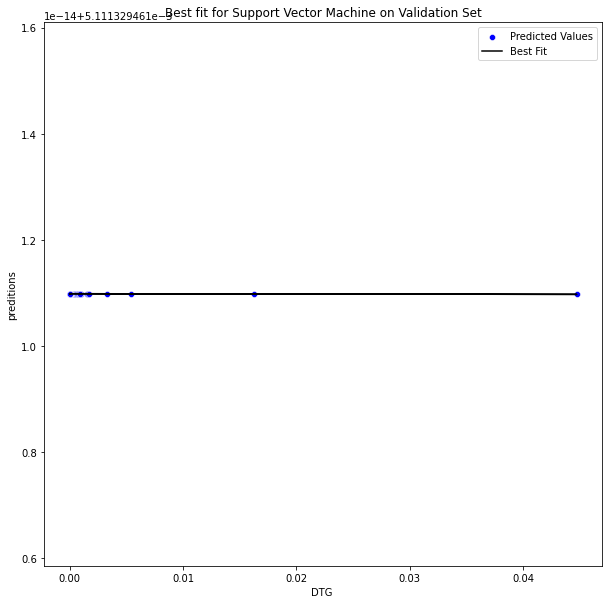

In [ ]:
x = final_df['DTG ']
y = final_df['preditions']
a,b = np.polyfit(x,y,1)
plt.figure(figsize=(10, 10))
sns.scatterplot(x, y ,color = 'blue', label = 'Predicted Values')
plt.plot(x, a*x+b, color='black', label = 'Best Fit') 
plt.title('Best fit for Support Vector Machine on Validation Set')
plt.legend()

In [ ]:

df_test = dataframe.loc[dataframe['label'] == "Test"]
X_test =  df_test[['time', 'tem', 'heating rate']]
y_test = df_test['DTG ']

predictions_test = svr.predict(X_test)
prediction_test  = pd.DataFrame(predictions_test)
prediction_test

print('MSE',mean_squared_error(y_test,predictions_test))
print('RMSE',math.sqrt(mean_squared_error(y_test, predictions_test)))
print('MAE',mean_absolute_error(y_test,predictions_test))
print('R2_Score',r2_score(y_test,predictions_test))

MSE 2.520309404233062e-05
RMSE 0.005020268323738346
MAE 0.00501113526175347
R2_Score -167.83448732535817


In [ ]:
X_test_df = pd.DataFrame(X_test)
X_test_df = X_test_df.reset_index(drop = True)
prediction = pd.DataFrame(predictions_test)
y_test_df =  pd.DataFrame(y_test)
y_test_df = y_test_df.reset_index(drop= True)
final_df_test = pd.concat([X_test_df,prediction,y_test_df],axis =1)
final_df_test.rename(columns={0: "predictions_test"}, errors="raise",inplace =  True)
final_df_test

,time,tem,heating rate,predictions_test,DTG
0,9.122055e-07,0.016664,0.999861,0.005111,0.000006
1,7.300459e-05,0.148340,0.988936,0.005111,0.000048
2,1.285670e-04,0.196116,0.980581,0.005111,0.000062
3,3.446661e-04,0.316228,0.948683,0.005111,0.000103
4,5.231837e-04,0.384615,0.923077,0.005111,0.000122
...,...,...,...,...,...
401,6.901026e-02,0.997501,0.015114,0.005111,0.000000
402,6.913824e-02,0.997494,0.015007,0.005111,0.000000
403,6.914473e-02,0.997494,0.015004,0.005111,0.000000
404,6.915051e-02,0.997493,0.015000,0.005111,0.000000


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


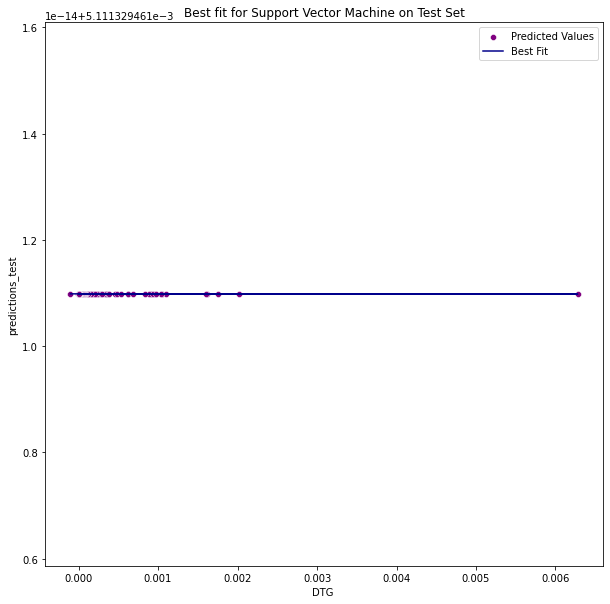

In [ ]:
x = final_df_test['DTG ']
y = final_df_test['predictions_test']
a,b = np.polyfit(x,y,1)
plt.figure(figsize=(10, 10))
sns.scatterplot(x, y ,color = 'purple', label = 'Predicted Values')
plt.plot(x, a*x+b, color='darkblue', label = 'Best Fit') 
plt.title('Best fit for Support Vector Machine on Test Set')
plt.legend()